In [8]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FormatStrFormatter
import matplotlib.font_manager as fm
import palettable

In [9]:
import warnings
warnings.filterwarnings('ignore')

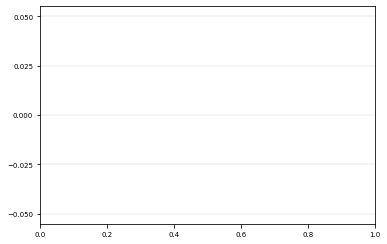

In [10]:
mpl.__version__
mpl.rcParams.update({'font.size': 7})
mpl.rcParams['axes.grid'] = True
mpl.rcParams.update({'axes.grid.axis':'y','grid.color':'#949494','grid.linewidth':0.2})
plt.locator_params(axis='y', nbins=5)   # y-axis

In [33]:
df = pd.read_csv('../../output/direct_consumption_talk.csv')
df1 = pd.read_csv('../../output/direct_consumption_talk_higheps.csv')

In [12]:
df

,Unnamed: 0,tax_sce,regionbase,varphi,pe,tb,prop,te,jxbar_prime,jmbar_prime,...,delta_UCec,delta_UCecstar,welfare,welfare_noexternality,Qe1_prime,Qe1star_prime,Qe2_prime,Qe2star_prime,region_scenario,conv
0,0,Unilateral,OECD37 as Home,0.0,1.000000,0.000000,0.500000,0.0,0.057914,0.779597,...,-0.000000,-0.000000,-1.898713e-14,-1.898713e-14,9.303970,24.331330,0.0,0.0,3.0,1.0
1,2,Unilateral,OECD37 as Home,0.1,0.994630,0.039024,0.000000,0.1,0.057934,0.779597,...,-0.083649,0.011650,2.539586e-02,-2.529005e-02,8.990031,24.265912,0.0,0.0,3.0,1.0
2,4,Unilateral,OECD37 as Home,0.2,0.990246,0.077730,0.000012,0.2,0.057994,0.779597,...,-0.166202,0.021208,1.012011e-01,-1.005138e-01,8.668065,24.212371,0.0,0.0,3.0,1.0
3,6,Unilateral,OECD37 as Home,0.3,0.986792,0.116222,0.000007,0.3,0.058091,0.779597,...,-0.247784,0.028767,2.269975e-01,-2.250575e-01,8.337388,24.170115,0.0,0.0,3.0,1.0
4,8,Unilateral,OECD37 as Home,0.4,0.984228,0.154596,0.000005,0.4,0.058221,0.779597,...,-0.328527,0.034396,4.025126e-01,-3.988236e-01,7.997216,24.138690,0.0,0.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,91,EPC_hybrid,OECD and China as Home,4.5,1.046982,2.107837,0.616754,4.5,0.109883,0.902934,...,-3.482525,-0.076199,3.948034e+01,-1.680624e+01,0.000000,17.171934,0.0,0.0,6.0,1.0
796,93,EPC_hybrid,OECD and China as Home,4.6,1.042462,2.147011,0.620441,4.6,0.109548,0.902934,...,-3.515639,-0.069019,4.073257e+01,-1.693450e+01,0.000000,17.134829,0.0,0.0,6.0,1.0
797,95,EPC_hybrid,OECD and China as Home,4.7,1.038068,2.186041,0.624058,4.7,0.109222,0.902934,...,-3.548377,-0.062008,4.198758e+01,-1.706222e+01,0.000000,17.098676,0.0,0.0,6.0,1.0
798,97,EPC_hybrid,OECD and China as Home,4.8,1.033794,2.224932,0.627609,4.8,0.108905,0.902934,...,-3.580748,-0.055160,4.324531e+01,-1.718937e+01,0.000000,17.063439,0.0,0.0,6.0,1.0


In [19]:
def plot_tax(fig, lodf, xlow = -35, xhigh = 0, ylow = 0, yhigh = 40, varphi = 20, x = 'welfare_noexternality', y = 'Qeworld_chg', region = 3):
    i=0
    for ax in fig.get_axes():
        ax.set_xlim(xlow,xhigh)
        ax.set_ylim(ylow,yhigh)
        ax.spines["top"].set_visible(False)    
        ax.spines["bottom"].set_visible(True)    
        ax.spines["right"].set_visible(False)    
        ax.spines["left"].set_visible(False)
        
        df = lodf[i]
        i += 1

        df = df[df['varphi'] <= varphi]
        df_opt = df[(df['tax_sce']=='Unilateral') & (df['region_scenario']==region)] 
        df_opt['Qeworld_chg']=-(df_opt['Qeworld_prime']-df_opt['Qeworld_prime'].iat[0]) / df_opt['Qeworld_prime'].iat[0]
        #df['Qeworld_chg']=-(df['Qeworld_prime']-Qeworld)/Qeworld*100
        #x = 'varphi'
        #y = 'ratio'

        ##puretp
        df_plot=df[(df['tax_sce']=='puretp') & (df['region_scenario']==region)] 
        df_plot['Qeworld_chg']=-(df_plot['Qeworld_prime']-df_plot['Qeworld_prime'].iat[0])/df_plot['Qeworld_prime'].iat[0] * 100
        df_plot['ratio'] = np.array(df_plot['Qeworld_chg']) / np.array(df_opt['Qeworld_chg'])
        l1, = ax.plot(df_plot[x],df_plot[y],linestyle='dashed',dashes = (5,1), label = 'production tax')
        dot=df_plot[df_plot['varphi']==2] #puretp
        ax.plot(dot[x],dot[y], marker='x', markersize=3, color='red') 

        ##puretc
        df_plot=df[(df['tax_sce']=='puretc') & (df['region_scenario']==region)] 
        df_plot['Qeworld_chg']=-(df_plot['Qeworld_prime']-df_plot['Qeworld_prime'].iat[0]) / df_plot['Qeworld_prime'].iat[0] * 100
        df_plot['ratio'] = np.array(df_plot['Qeworld_chg']) / np.array(df_opt['Qeworld_chg'])
        l3, = ax.plot(df_plot[x],df_plot[y],linestyle='dashed',dashes = (5,3), label = 'consumption tax')
        dot=df_plot[df_plot['varphi']==2] #puretp
        ax.plot(dot[x],dot[y], marker='x', markersize=3, color='red') 

        ##extracion/production
        df_plot=df[(df['tax_sce']=='EP_hybrid')  & (df['region_scenario']==region)] 
        df_plot['Qeworld_chg']=-(df_plot['Qeworld_prime']-df_plot['Qeworld_prime'].iat[0]) / df_plot['Qeworld_prime'].iat[0] * 100
        df_plot['ratio'] = np.array(df_plot['Qeworld_chg']) / np.array(df_opt['Qeworld_chg'])
        l5, = ax.plot(df_plot[x],df_plot[y],linestyle='dashed', label = 'extraction-production')
        dot=df_plot[df_plot['varphi']==2] #puretp
        ax.plot(dot[x],dot[y], marker='x', markersize=3, color='red') 

        # #extraction/consumption
        df_plot=df[(df['tax_sce']=='EC_hybrid') & (df['region_scenario']==region)]
        df_plot['Qeworld_chg']=-(df_plot['Qeworld_prime']-df_plot['Qeworld_prime'].iat[0]) / df_plot['Qeworld_prime'].iat[0] * 100
        df_plot['ratio'] = np.array(df_plot['Qeworld_chg']) / np.array(df_opt['Qeworld_chg'])
        l6, = ax.plot(df_plot[x],df_plot[y],linestyle='dashdot', label = 'extraction-consumption')
        dot=df_plot[df_plot['varphi']==2] #puretp
        ax.plot(dot[x],dot[y], marker='x', markersize=3, color='red') 

        # #extraction/consumption/production
        df_plot=df[(df['tax_sce']=='EPC_hybrid') & (df['region_scenario']==region)]
        df_plot['Qeworld_chg']=-(df_plot['Qeworld_prime']-df_plot['Qeworld_prime'].iat[0]) / df_plot['Qeworld_prime'].iat[0] * 100
        df_plot['ratio'] = np.array(df_plot['Qeworld_chg']) / np.array(df_opt['Qeworld_chg'])
        l8, = ax.plot(df_plot[x],df_plot[y],linestyle='dashdot', label = 'extraction-cons-prod')
        dot=df_plot[df_plot['varphi']==2] #puretp
        ax.plot(dot[x],dot[y], marker='x', markersize=3, color='red') 

        ##unilateral optimal
        df_plot=df[(df['tax_sce']=='Unilateral') & (df['region_scenario']==region)] 
        df_plot['Qeworld_chg']=-(df_plot['Qeworld_prime']-df_plot['Qeworld_prime'].iat[0]) / df_plot['Qeworld_prime'].iat[0] * 100
        df_plot['ratio'] = np.array(df_plot['Qeworld_chg']) / np.array(df_opt['Qeworld_chg'])
        l7, = ax.plot(df_plot[x],df_plot[y],linestyle='solid', label = 'unilateral optimal')
        dot=df_plot[df_plot['varphi']==2] #puretp
        ax.plot(dot[x],dot[y], marker='x', markersize=3, color='red') 

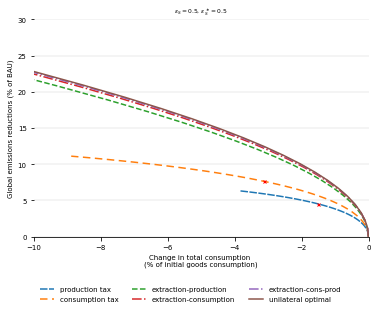

In [30]:
fig, (ax1) = plt.subplots(1, 1)   
#ax2.plot(df4['welfare_noexternality'], df4['Qeworld_chg'], linestyle = 'solid', label = 'global planner', color = "purple")

plot_tax(fig, [df], xlow = -10, xhigh =0, yhigh = 30, varphi = 20)
ylab = 'Global emissions reductions (% of BAU)'
xlab = 'Change in total consumption \n(% of initial goods consumption)'
#ylab = 'Global emissions reduction (% of BAU)'
#xlab = 'varphi'
ax1.set_title(r"$\epsilon_S=0.5$, $\epsilon_S^\ast=0.5$", fontsize=6)
ax1.set_ylabel(ylab)
ax1.set_xlabel(xlab)

ax1.legend(loc='upper left', bbox_to_anchor=(0, -0.2),fancybox=True, shadow=False, ncol=3, frameon=False)
plt.savefig('../../plots/plots_talk/oecd.pdf', format='PDF', bbox_inches='tight')

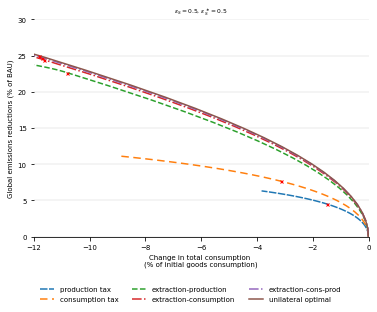

In [31]:
fig, (ax1) = plt.subplots(1, 1)   
#ax2.plot(df4['welfare_noexternality'], df4['Qeworld_chg'], linestyle = 'solid', label = 'global planner', color = "purple")

plot_tax(fig, [df], xlow = -12, xhigh =0, yhigh = 30, varphi = 20)
ylab = 'Global emissions reductions (% of BAU)'
xlab = 'Change in total consumption \n(% of initial goods consumption)'
#ylab = 'Global emissions reduction (% of BAU)'
#xlab = 'varphi'
ax1.set_title(r"$\epsilon_S=0.5$, $\epsilon_S^\ast=0.5$", fontsize=6)
ax1.set_ylabel(ylab)
ax1.set_xlabel(xlab)

ax1.legend(loc='upper left', bbox_to_anchor=(0, -0.2),fancybox=True, shadow=False, ncol=3, frameon=False)
plt.savefig('../../plots/plots_talk/oecd_longer.pdf', format='PDF', bbox_inches='tight')

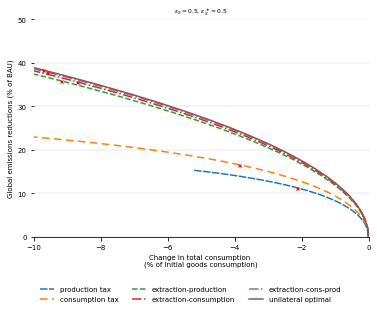

In [32]:
fig, (ax1) = plt.subplots(1, 1)   
#ax2.plot(df4['welfare_noexternality'], df4['Qeworld_chg'], linestyle = 'solid', label = 'global planner', color = "purple")

plot_tax(fig, [df], xlow = -10, xhigh =0, yhigh = 50, varphi = 20, region= 6)
ylab = 'Global emissions reductions (% of BAU)'
xlab = 'Change in total consumption \n(% of initial goods consumption)'
#ylab = 'Global emissions reduction (% of BAU)'
#xlab = 'varphi'
ax1.set_title(r"$\epsilon_S=0.5$, $\epsilon_S^\ast=0.5$", fontsize=6)
ax1.set_ylabel(ylab)
ax1.set_xlabel(xlab)

ax1.legend(loc='upper left', bbox_to_anchor=(0, -0.2),fancybox=True, shadow=False, ncol=3, frameon=False)
plt.savefig('../../plots/plots_talk/oecd_china.pdf', format='PDF', bbox_inches='tight')

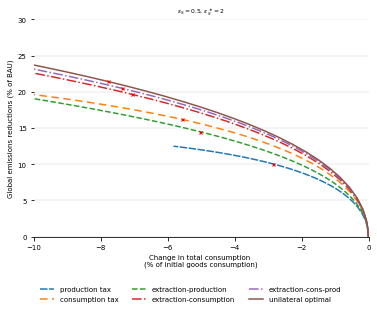

In [39]:
fig, (ax1) = plt.subplots(1, 1)   
#ax2.plot(df4['welfare_noexternality'], df4['Qeworld_chg'], linestyle = 'solid', label = 'global planner', color = "purple")

plot_tax(fig, [df1], xlow = -10, xhigh =0, yhigh = 30, varphi = 20)
ylab = 'Global emissions reductions (% of BAU)'
xlab = 'Change in total consumption \n(% of initial goods consumption)'
#ylab = 'Global emissions reduction (% of BAU)'
#xlab = 'varphi'
ax1.set_title(r"$\epsilon_S=0.5$, $\epsilon_S^\ast=2$", fontsize=6)
ax1.set_ylabel(ylab)
ax1.set_xlabel(xlab)

ax1.legend(loc='upper left', bbox_to_anchor=(0, -0.2),fancybox=True, shadow=False, ncol=3, frameon=False)
plt.savefig('../../plots/plots_talk/oecd_higheps.pdf', format='PDF', bbox_inches='tight')

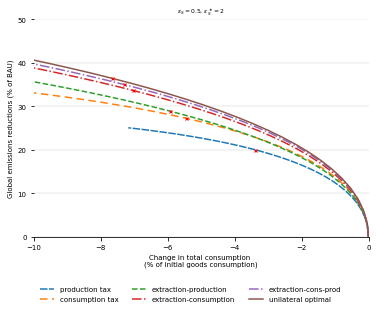

In [36]:
fig, (ax1) = plt.subplots(1, 1)   
#ax2.plot(df4['welfare_noexternality'], df4['Qeworld_chg'], linestyle = 'solid', label = 'global planner', color = "purple")

plot_tax(fig, [df1], xlow = -10, xhigh = 0, yhigh = 50, varphi = 20, region= 6)
ylab = 'Global emissions reductions (% of BAU)'
xlab = 'Change in total consumption \n(% of initial goods consumption)'
#ylab = 'Global emissions reduction (% of BAU)'
#xlab = 'varphi'
ax1.set_title(r"$\epsilon_S=0.5$, $\epsilon_S^\ast=2$", fontsize=6)
ax1.set_ylabel(ylab)
ax1.set_xlabel(xlab)

ax1.legend(loc='upper left', bbox_to_anchor=(0, -0.2),fancybox=True, shadow=False, ncol=3, frameon=False)
plt.savefig('../../plots/plots_talk/oecd_china_higheps.pdf', format='PDF', bbox_inches='tight')